In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

In [4]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [8]:
numrows=25549

In [9]:
Decision_tree=pd.DataFrame({'today':[0.0]*numrows,
                           'tomorrow':[True]*numrows})

In [10]:
seq=['tomorrow' , 'today']

In [11]:
Decision_tree=Decision_tree.reindex(columns=seq)

for i in range(0 , numrows):
    tomorrow =data.iloc[i,1]
    today=data.iloc[(i-1),1]
    Decision_tree.iat[i,1]=tomorrow 
    Decision_tree.iat[i,0]=today
    
Decision_tree=Decision_tree.dropna()

In [12]:
Decision_tree.head()

,tomorrow,today
0,False,0.47
1,True,0.59
2,True,0.42
3,True,0.31
4,True,0.17


In [13]:
from sklearn import tree 
x=Decision_tree.today.values
y=Decision_tree.tomorrow.values
x=x.reshape(Decision_tree.shape[0],1)

In [15]:
clf=tree.DecisionTreeClassifier(criterion='entropy').fit(x,y)

In [16]:
score=clf.score(x,y)
print(score)

0.711305096688327


In [19]:
from sklearn import metrics
predi=clf.predict(x)
cm=metrics.confusion_matrix(y,predi)
print(cm)

[[10975  3669]
 [ 3706  7196]]


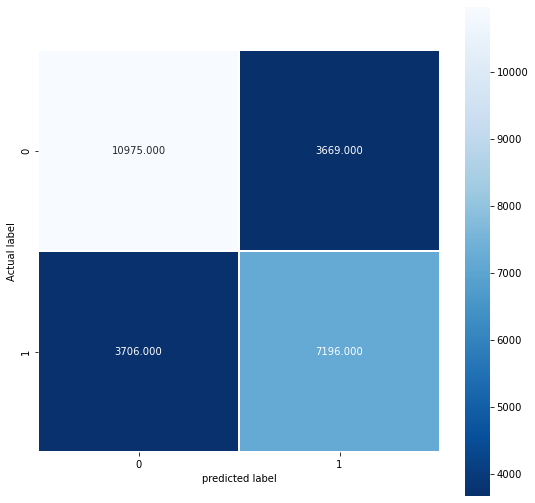

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm , annot=True , fmt=".3f", linewidths=0.5,
          square=True , cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('predicted label');
all_sample_title='accurancy score: {0}'.format(score)

In [46]:
dotfile=open('dt.dot','w')
graph=tree.export_graphviz(clf, out_file=dotfile)
dotfile.close()

#### I think I have a problem with dowloading **graphviz**, so to display the tree I used http://webgraphviz.com/ webpage 
